# A Simple Guide to Scikit-Learn — Building a Machine Learning Model in Python

Source: https://towardsdatascience.com/a-beginners-guide-to-text-classification-with-scikit-learn-632357e16f3a

Problem formulation: Our goal is to find which machine learning model is best suited to predict sentiment (output) given a movie review (input).

In [1]:
# preparing the data
# reading the dataset

import pandas as pd
df_review = pd.read_csv('IMDB Dataset.csv')
df_review

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [2]:
# This dataset contains 50000 rows; however, to train our model faster in the following steps, 
# we’re going to take a smaller sample of 10000 rows. 
# This small sample will contain 9000 positive and 1000 negative reviews to make the data imbalanced

df_positive = df_review[df_review['sentiment']=='positive'][:9000]
df_negative = df_review[df_review['sentiment']=='negative'][:1000]
df_review_imb = pd.concat([df_positive, df_negative])

In [3]:
import matplotlib.pyplot as plt

df = (df_review_imb
      .groupby(['sentiment'],as_index=False)
      .count()
      )

df

,sentiment,review
0,negative,1000
1,positive,9000


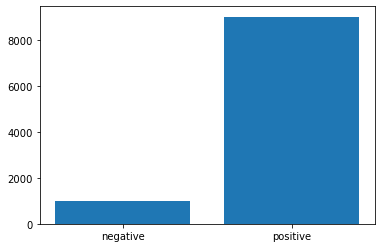

In [4]:
plt.bar(df['sentiment'], df['review'])
plt.show()

As we can see there are more positive than negative reviews in <code>df_review_imb</code> so we have imbalanced data.

In [5]:
# we use the imblearn library and RandomUnderSampler function to balance the data

from imblearn.under_sampling import  RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
df_review_bal, df_review_bal['sentiment']=rus.fit_resample(df_review_imb[['review']],
                                                           df_review_imb['sentiment'])
df_review_bal

,review,sentiment
0,Basically there's a family where a little boy ...,negative
1,"This show was an amazing, fresh & innovative i...",negative
2,Encouraged by the positive comments about this...,negative
3,Phil the Alien is one of those quirky films wh...,negative
4,I saw this movie when I was about 12 when it c...,negative
...,...,...
1995,Knute Rockne led an extraordinary life and his...,positive
1996,At the height of the 'Celebrity Big Brother' r...,positive
1997,This is another of Robert Altman's underrated ...,positive
1998,This movie won a special award at Cannes for i...,positive


In [6]:
# After this, x and y are balanced and we’ll store it in a new dataset named df_review_bal

print(df_review_imb.value_counts('sentiment'))
print(df_review_bal.value_counts('sentiment'))

sentiment
positive    9000
negative    1000
dtype: int64
sentiment
positive    1000
negative    1000
dtype: int64


### Splitting data into train and test set

We’ll use sklearn’s <code>train_test_split</code> to do the job. In this case, we set 33% to the test data.

In [7]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_review_bal, test_size=0.33, random_state=42)

Now we can set the independent and dependent variables within our train and test set.

In [8]:
train_x, train_y = train['review'], train['sentiment']
test_x, test_y = test['review'], test['sentiment']

Classifiers and learning algorithms expect numerical feature vectors rather than raw text documents. This is why we need to turn our movie review text into numerical vectors. There are many text representation techniques such as one-hot encoding, bag of words, and wor2vec.

For this simple, we’ll use bag of words (BOW) since we care about the frequency of the words in text reviews; however, the order of words is irrelevant.

### Turning our text data into numerical vectors

In our original dataset, we want to identify unique/representative words for positive reviews and negative reviews, so we’ll choose the TF-IDF. To turn text data into numerical vectors with TF-IDF, we write the following code.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
train_x_vector = tfidf.fit_transform(train_x)
train_x_vector

<1340x20625 sparse matrix of type '<class 'numpy.float64'>'
	with 118834 stored elements in Compressed Sparse Row format>

In [10]:
pd.DataFrame.sparse.from_spmatrix(train_x_vector,
                                  index=train_x.index,
                                  columns=tfidf.get_feature_names_out())

,00,000,007,01pm,02,04,08,10,100,1000,...,zooming,zooms,zues,zzzzzzzzzzzzzzzzzz,æon,élan,émigré,ísnt,ïn,ünfaithful
81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.042791,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# transform the test_x_vector, so we can test the accuracy of the model later

test_x_vector = tfidf.transform(test_x)

### Support Vector Machines (SVM)
To fit an SVM model, we need to introduce the input (text reviews as numerical vectors) and output (sentiment)

In [12]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(train_x_vector, train_y)

SVC(kernel='linear')

After fitting <code>svc</code> we can predict whether a review is positive or negative with the <code>.predict()</code> method.

In [13]:
print(svc.predict(tfidf.transform(['A good movie'])))
print(svc.predict(tfidf.transform(['An excellent movie'])))
print(svc.predict(tfidf.transform(['I did not like this movie at all'])))

['positive']
['positive']
['negative']


### Decision Tree
To fit a decision tree model, we need to introduce the input (text reviews as numerical vectors) and output (sentiment)

In [14]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(train_x_vector, train_y)

DecisionTreeClassifier()

### Naive Bayes
To fit a Naive Bayes model, we need to introduce the input (text reviews as numerical vectors) and output (sentiment)

In [15]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x_vector.toarray(), train_y)

GaussianNB()

### Logistic Regression
To fit a Logistic Regression model, we need to introduce the input (text reviews as numerical vectors) and output (sentiment)

In [16]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(train_x_vector, train_y)

LogisticRegression()

### Model Evaluation
In this section, we’ll see traditional metrics used to evaluate our models.
Mean Accuracy

To obtain the mean accuracy of each model, just use the <code>.score</code> method with the test samples and true labels as shown below.

In [17]:
# svc.score('Test samples', 'True labels')

print(svc.score(test_x_vector, test_y))
print(dec_tree.score(test_x_vector, test_y))
print(gnb.score(test_x_vector.toarray(), test_y))
print(log_reg.score(test_x_vector, test_y))

0.8409090909090909
0.6651515151515152
0.6348484848484849
0.8303030303030303


### F1 Score
F1 Score is the weighted average of Precision and Recall. 

In [18]:
from sklearn.metrics import f1_score
f1_score(test_y, svc.predict(test_x_vector),
         labels=['positive', 'negative'],
         average=None)

array([0.84671533, 0.83464567])

### Classification report
We can also build a text report showing the main classification metrics that include those calculated before

In [19]:
from sklearn.metrics import classification_report
print(classification_report(test_y, 
                            svc.predict(test_x_vector),
                            labels=['positive', 'negative']))

              precision    recall  f1-score   support

    positive       0.83      0.87      0.85       335
    negative       0.85      0.82      0.83       325

    accuracy                           0.84       660
   macro avg       0.84      0.84      0.84       660
weighted avg       0.84      0.84      0.84       660



### Confusion Matrix
A confusion matrix) is a table that allows visualization of the performance of an algorithm. This table typically has two rows and two columns that report the number of false positives, false negatives, true positives, and true negatives

In [23]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(test_y, 
                            svc.predict(test_x_vector), 
                            labels=['positive', 'negative'])

conf_mat

array([[290,  45],
       [ 60, 265]], dtype=int64)

### Tuning the Model
Finally, it’s time to maximize our model’s performance.

#### GridSearchCV
This is technique consists of an exhaustive search on specified parameters in order to obtain the optimum values of hyperparameters. 

In [25]:
from sklearn.model_selection import GridSearchCV
#set the parameters
parameters = {'C': [1,4,8,16,32] ,'kernel':['linear', 'rbf']}
svc = SVC()
svc_grid = GridSearchCV(svc,parameters, cv=5)

svc_grid.fit(train_x_vector, train_y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 4, 8, 16, 32], 'kernel': ['linear', 'rbf']})

In [26]:
print(svc_grid.best_params_)
print(svc_grid.best_estimator_)

{'C': 1, 'kernel': 'linear'}
SVC(C=1, kernel='linear')
